Error: Failed to load image C:\python data science\CNN\Model\mobile\VideoCapture_20240703-224354.jpg
Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.7274 - loss: 0.5438 - val_accuracy: 0.9629 - val_loss: 0.2018
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9290 - loss: 0.2287 - val_accuracy: 0.9802 - val_loss: 0.0879
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9447 - loss: 0.1789 - val_accuracy: 0.9839 - val_loss: 0.0616
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9494 - loss: 0.1407 - val_accuracy: 0.9765 - val_loss: 0.0668
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9580 - loss: 0.1320 - val_accuracy: 0.9666 - val_loss: 0.1034
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9688 - loss: 0.0958 - val_accuracy: 0.9728 - val_loss: 0.1082
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9617 - loss: 0.1075 - val_accuracy: 0.9864 - val_loss: 0.

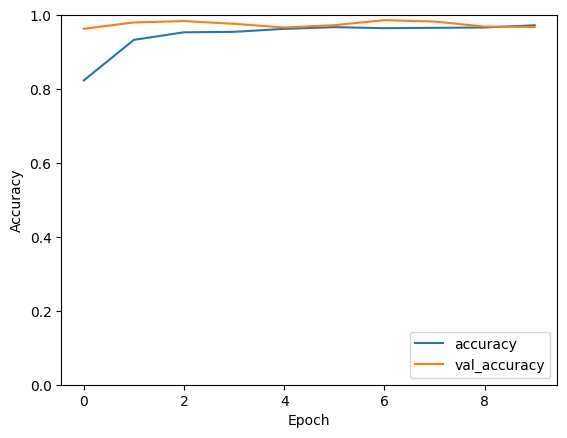

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


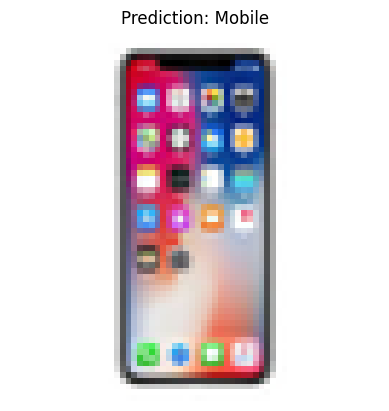

In [3]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from PIL import Image

calculator_dir = r'C:\python data science\CNN\Model\calculator'
mobil_dir = r'C:\python data science\CNN\Model\mobile'
# Image size
img_size = 64

# Function to load images and labels
def load_images_and_labels():
    images = []
    labels = []
    for label, directory in enumerate([calculator_dir, mobil_dir]):
        for filename in os.listdir(directory):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is not None:  # Check if the image is loaded correctly
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(label)
            else:
                print(f"Error: Failed to load image {img_path}")
    return np.array(images), np.array(labels)  # label for class cal=0 mob=1

# Load images and labels
images, labels = load_images_and_labels()
labels = to_categorical(labels, num_classes=2)

# Normalize the images
images = images / 255.0

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the CNN model
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))

# Save the model
os.makedirs('Models', exist_ok=True)
model.save('Models/image_classifier.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Inference section
def predict_image_from_url(url):
    img = Image.open(url)
    img = img.resize((img_size, img_size))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    model = load_model('Models/image_classifier.h5')
    prediction = model.predict(img_array)
    labels = ['Calculator', 'Mobile']
    predicted_label = labels[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f'Prediction: {predicted_label}')
    plt.axis('off')
    plt.show()

# Example URL for testing
url = r'C:\python data science\CNN\Model\mobile\mob.jpeg'
predict_image_from_url(url)
